# Assignment 1

Using the Twitter data you collected using DMI-TCAT, explain the distributions of three numerical variables in your dataset. Then find if there is a linear relationship between two of the variables (only with visualizations, no need for interpreting statistical values).

In [1]:
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import matplotlib as mpl
import numpy as np
from scipy import stats, integrate
%matplotlib inline

In [3]:
data=pd.read_excel('digitalanalytics-excel.xlsx')

In [4]:
data.dtypes

id                                      int64
time                                    int64
created_at                     datetime64[ns]
from_user_name                         object
text                                   object
filter_level                           object
possibly_sensitive                    float64
withheld_copyright                    float64
withheld_scope                        float64
truncated                               int64
retweet_count                           int64
favorite_count                          int64
lang                                   object
to_user_name                           object
in_reply_to_status_id                 float64
quoted_status_id                      float64
source                                 object
location                               object
lat                                   float64
lng                                   float64
from_user_id                            int64
from_user_realname                

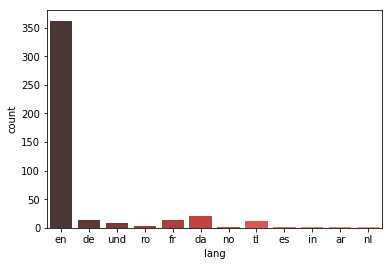

In [5]:
sns.countplot(x="lang", data=data, palette="Reds_d")

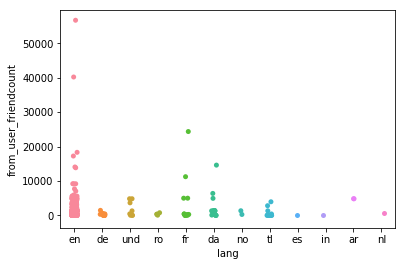

In [6]:
sns.stripplot(x="lang", y="from_user_friendcount", data=data, jitter=True)

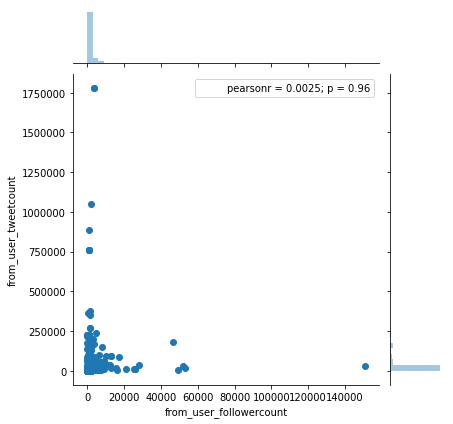

In [7]:
sns.jointplot(x="from_user_followercount", y="from_user_tweetcount", data=data)

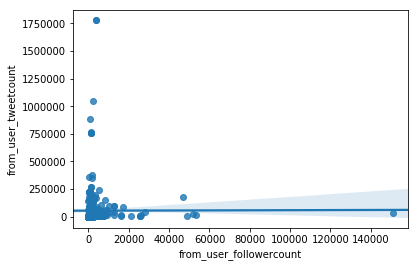

In [8]:
sns.regplot(x="from_user_followercount", y="from_user_tweetcount", data=data)

Categorize the tweets you collected and visualize the number of tweets per each category and explain the output. 

In [9]:
def word_present(text, query):
    import re
    text = str(text).lower()
    newquery = []
    for word in query:
        newquery.append(str(word).lower())
    tokens = re.findall(r"[\w']+|[.,!?;$@#]", text)
    
    for word in newquery:
        if word in tokens:
            return 1
    return 0

In [10]:
data['data']=data['text'].apply(word_present,args=(['data']))
data['social media']=data['text'].apply(word_present,args=(['social media']))
data['online']=data['text'].apply(word_present,args=(['online']))

In [11]:
def categorise_df(row):
    row['text includes'] = "text includes"
    if (row['data'] == 1) and (row['social media'] == 1) and (row['online'] == 1):
        row['text includes'] = 'All'
    if (row['data'] == 1) and (row['social media'] == 0) and (row['online'] == 0):
        row['text includes'] = 'data'
    if (row['data'] == 0) and (row['social media'] == 1) and (row['online'] == 0):
        row['text includes'] = 'social media'
    if (row['data'] == 0) and (row['social media'] == 0) and (row['online'] == 1):
        row['text includes'] = 'online'
    if (row['data'] == 1) and (row['social media'] == 1) and (row['online'] == 0):
        row['text includes'] = 'data and social media'
    if (row['data'] == 1) and (row['social media'] == 0) and (row['online'] == 1):
        row['text includes'] = 'data and online'
    if (row['data'] == 0) and (row['social media'] == 1) and (row['online'] == 1):
        row['text includes'] = 'social media and online'
    if (row['data'] == 0) and (row['social media'] == 0) and (row['online'] == 0):
        row['text includes'] = 'Nothing'
    return row

In [12]:
data = data.apply(categorise_df, axis=1)

In [13]:
data['text includes'].value_counts()

data                       357
data and social media       57
All                         17
Nothing                      7
social media and online      2
social media                 1
Name: text includes, dtype: int64

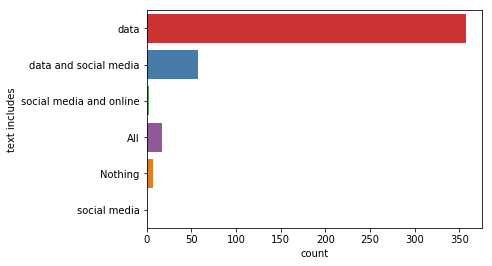

In [14]:
sns.countplot(y="text includes", data= data, palette="Set1")

Merge your sentiment analysis results and compare the results according to the categorize you created.

In [15]:
data_filtered=data[data['from_user_lang']=='en']

In [17]:
new_data=data_filtered[['id','text','text includes']]

In [18]:
import pickle

In [19]:
tweet_sentiment=pickle.load(open("Trang-Nhung Pham - NhungPham_EN_completed.pkl","rb"))

In [45]:
tweet_data=pickle.load(open("NhungPham_EN.pkl","rb"))

In [46]:
tweet_data['data']=tweet_data['text'].apply(word_present,args=(['data']))
tweet_data['social media']=tweet_data['text'].apply(word_present,args=(['social media']))
tweet_data['online']=tweet_data['text'].apply(word_present,args=(['online']))

In [47]:
tweet_data = tweet_data.apply(categorise_df, axis=1)

In [49]:
tweet_data.columns

Index(['id', 'text', 'data', 'social media', 'online', 'text includes'], dtype='object')

In [50]:
data_sentiment=pd.merge(tweet_sentiment, tweet_data,on=['id','text'])

In [68]:
data_sentiment.columns

Index(['id', 'text', 'negative', 'positive', 'neutral', 'data', 'social media',
       'online', 'text includes', 'sentiment'],
      dtype='object')

*Table "data" that I used from the beginning was the origin of the sentiment analysis table. I filtered it (above) by language to get the same table as the one sent for sentiment analysis, however when I merged two tables the result was always just 12 rows while each table had nearly 400 rows. I tried several times but couldnt fix this, I think there maybe errors somewhere that make two tables different in the end. Therefore I imported the exact table I sent for sentiment analysis and things worked fine.
Is there any chance that the problem happened just because the two tables are of different formats (excel and pickle)?*

In [77]:
data_sentiment['negative']=data_sentiment['negative'].apply(pd.to_numeric)
data_sentiment['positive']=data_sentiment['positive'].apply(pd.to_numeric)
data_sentiment['neutral']=data_sentiment['neutral'].apply(pd.to_numeric)
data_sentiment['sentiment']=data_sentiment['negative']+data_sentiment['positive']+data_sentiment['neutral']

In [78]:
x=data_sentiment[data_sentiment['text includes']=='data']

In [87]:
data_sentiment.groupby('text includes', as_index=False)['sentiment'].mean()

,text includes,sentiment
0,All,0.615385
1,Nothing,-0.166667
2,data,0.263666
3,data and social media,0.119048
4,social media,0.000000
5,social media and online,-2.000000


*with the above code we can have the mean of sentiment as well as other numerical variable of all categories*

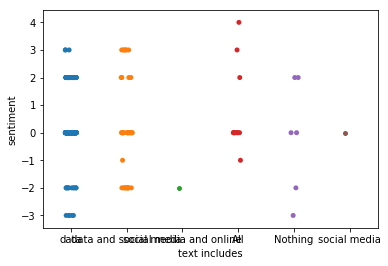

In [88]:
sns.stripplot(x="text includes", y="sentiment", data=data_sentiment, jitter=True)

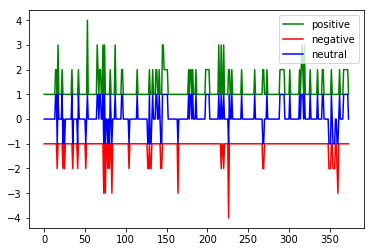

In [86]:
plt.plot(data_sentiment[['positive']],color='g',label='positive')
plt.plot(data_sentiment[['negative']],color='r',label='negative')
plt.plot(data_sentiment[['neutral']],color='b',label='neutral')
plt.legend(loc='upper right')
plt.show()

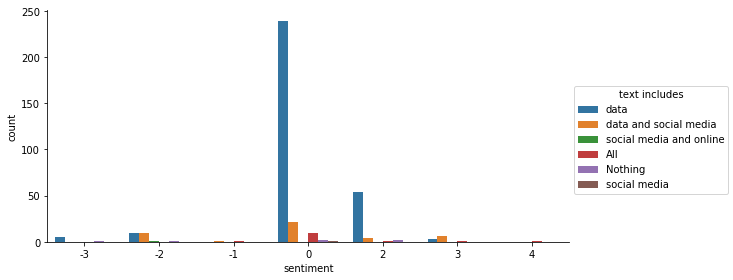

In [60]:
sns.factorplot(x='sentiment', data=data_sentiment, aspect=2.0, kind='count',hue='text includes')

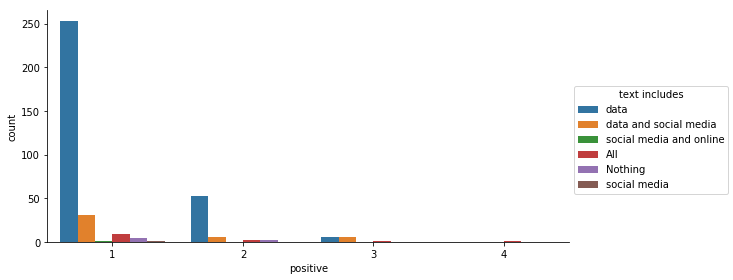

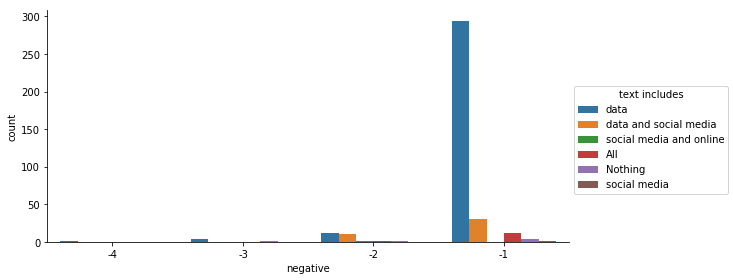

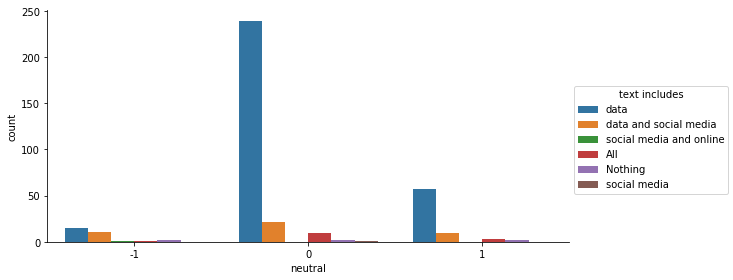

In [99]:
sns.factorplot(x='positive', data=data_sentiment, aspect=2.0, kind='count',hue='text includes')
sns.factorplot(x='negative', data=data_sentiment, aspect=2.0, kind='count',hue='text includes')
sns.factorplot(x='neutral', data=data_sentiment, aspect=2.0, kind='count',hue='text includes')

 Find the most optimal way to visualize the categorize to present the sentiment analysis results. Explain the output and report your findings.
 
 *factorplot seems to be a good choice to visualise this table. However I havent found a way to visualise all elements in one graph. For now I can only visualise them separately*

# Optional Assignment

Change the colour of one of the visualizations background from light blue to white.

*I dont know why but I didnt do anything though all the backgrounds of my visualizations are white already.*